# Exploratory Data Analysis

### Loading the dataset

In [1]:
# -*- coding: utf-8 -*-
import pandas as  pd
import numpy as np

In [2]:
model = dict()
with open('./full/total/subjects', 'r', encoding="utf8") as f:
    subs = f.read()
''''''
with open('./full/total/relations', 'r', encoding="utf8") as f:
    rels = f.read()
	
with open('./full/total/objects', 'r', encoding="utf8") as f:
    obs = f.read()

labels =np.array( pd.read_csv('./full/total/labels',header=None))
from string import punctuation


all_text = ''.join([c for c in subs if c not in punctuation])
subs = all_text.split('\n')

all_text = ''.join([c for c in rels if c not in punctuation])
rels = all_text.split('\n')

all_text = ''.join([c for c in obs if c not in punctuation])
obs = all_text.split('\n')

all_text = ' '.join(subs)
all_text += ' '.join(rels)
all_text += ' '.join(obs)
words_all = all_text.lower().split()



# changing here
words = list(set(words_all))
vocab_to_int = dict()

for i in range(len(words)):
    vocab_to_int.update({words[i]: i})
# from collections import Counter
# counts = Counter(words)
# vocab = sorted(counts, key=counts.get, reverse=True)
# vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

sub_ints = []
for each in subs:
    each = each.lower()
    sub_ints.append([vocab_to_int[word] for word in each.split()])


rel_ints = []
for each in rels:
    each = each.lower()
    rel_ints.append([vocab_to_int[word] for word in each.split()])

ob_ints = []
for each in obs:
    each = each.lower()
    ob_ints.append([vocab_to_int[word] for word in each.split()])



#labels = np.array([1 if l == "Positive" else 0 for l in labels_org.split()])

from collections import Counter

sub_lens = Counter([len(x) for x in sub_ints])
rel_lens = Counter([len(x) for x in rel_ints])
ob_lens = Counter([len(x) for x in ob_ints])
print("Zero-length sub {}".format(sub_lens[0]))
print("Maximum sub length: {}".format(max(sub_lens)))

print("Zero-length rel: {}".format(rel_lens[0]))
print("Maximum rel length: {}".format(max(rel_lens)))

print("Zero-length obj: {}".format(ob_lens[0]))
print("Maximum obj length: {}".format(max(ob_lens)))


# Filter out that review with 0 length
#claim_ints = [r for r in claim_ints if len(r) > 0]
#sent_ints = [r[0:500] for r in sent_ints if len(r) > 0]


ts = []
tr = []
to = []

for i in range(len(subs)):
 if len(sub_ints[i])*len(rel_ints[i])*len(ob_ints[i]) > 0:
  ts.append(sub_ints[i])
  tr.append(rel_ints[i])
  to.append(ob_ints[i])

sub_ints = np.array(ts)
rel_ints = np.array(tr)
ob_ints = np.array(to)


from collections import Counter


sub_lens = Counter([len(x) for x in sub_ints])
print("Zero-length subs: {}".format(sub_lens[0]))
print("Maximum sub length: {}".format(max(sub_lens)))

rel_lens = Counter([len(x) for x in rel_ints])
print("Zero-length rels: {}".format(rel_lens[0]))
print("Maximum rel length: {}".format(max(rel_lens)))

ob_lens = Counter([len(x) for x in ob_ints])
print("Zero-length obs: {}".format(ob_lens[0]))
print("Maximum ob length: {}".format(max(ob_lens)))

mx_sub = max(sub_lens)
mx_rel = max(rel_lens)
mx_ob = max(ob_lens)

sub_seq_len = mx_sub
rel_seq_len = mx_rel
ob_seq_len = mx_ob
sub_features = np.zeros((len(sub_ints), sub_seq_len), dtype=int)
rel_features = np.zeros((len(rel_ints), rel_seq_len), dtype=int)
ob_features = np.zeros((len(ob_ints), ob_seq_len), dtype=int)

for i, row in enumerate(sub_ints):
    sub_features[i, -len(row):] = np.array(row)[:sub_seq_len]

for i, row in enumerate(rel_ints):
    rel_features[i, -len(row):] = np.array(row)[:rel_seq_len]

for i, row in enumerate(ob_ints):
    ob_features[i, -len(row):] = np.array(row)[:ob_seq_len]


split_frac = .1

split_index = int(split_frac * len(sub_features))

sub_features = sub_features[:split_index]
rel_features = rel_features[:split_index]
ob_features = ob_features[:split_index]
labels = labels[:split_index]
split_frac = .9
split_index = int(split_frac * len(sub_features))

train_sub, val_sub = sub_features[:split_index], sub_features[split_index:]
train_rel, val_rel = rel_features[:split_index], rel_features[split_index:]
train_ob, val_ob = ob_features[:split_index], ob_features[split_index:]
train_lab,val_lab = labels[:split_index], labels[split_index:]


#split_frac = 1
#split_index = int(split_frac * len(val_claim))

#val_claim, test_claim = val_claim[:split_index], val_claim[split_index:]
#val_sent, test_sent = val_sent[:split_index], val_sent[split_index:]
#val_y, test_y = val_y[:split_index], val_y[split_index:]


n_words = len(vocab_to_int) + 1  # Add 1 for 0 added to vocab

embed_size = 300

w2v_embed = np.ndarray([n_words, embed_size])

for i in range(n_words - 1):
    if words[i] not in model:
        w2v_embed[vocab_to_int[words[i]]] = np.array([0] * embed_size)
    else:
        w2v_embed[vocab_to_int[words[i]]] = model[words[i]]

import random

'''
idx = random.sample(range(len(train_claim)), len(train_claim))
train_claim_s = []
train_sent_s = []
train_y_s = []
for i in idx:
    train_claim_s.append(train_claim[i])
    train_sent_s.append(train_sent[i])
    train_y_s.append(train_y[i])
train_claim = np.array(train_claim_s)
train_sent = np.array(train_sent_s)
train_y = np.array(train_y_s)
#test_claim = np.array(test_claim)
#test_sent = np.array(test_sent)
#test_y = np.array(test_y)
'''

train_sub_e = np.ndarray((len(train_sub), mx_sub, embed_size))
train_rel_e = np.ndarray((len(train_rel), mx_rel, embed_size))
train_ob_e = np.ndarray((len(train_ob), mx_ob, embed_size))

for i in range(len(train_sub)):
    for j in range(mx_sub):
        train_sub_e[i][j][:] = w2v_embed[train_sub[i][j]]

for i in range(len(train_rel)):
    for j in range(mx_rel):
        train_rel_e[i][j][:] = w2v_embed[train_rel[i][j]]

for i in range(len(train_ob)):
    for j in range(mx_ob):
        train_ob_e[i][j][:] = w2v_embed[train_ob[i][j]]

val_sub_e = np.ndarray((len(val_sub), mx_sub, embed_size))
val_rel_e = np.ndarray((len(val_rel), mx_rel, embed_size))
val_ob_e = np.ndarray((len(val_ob), mx_ob, embed_size))

for i in range(len(val_sub)):
    for j in range(mx_sub):
        val_sub_e[i][j][:] = w2v_embed[val_sub[i][j]]

for i in range(len(val_rel)):
    for j in range(mx_rel):
        val_rel_e[i][j][:] = w2v_embed[val_rel[i][j]]

for i in range(len(val_ob)):
    for j in range(mx_ob):
        val_ob_e[i][j][:] = w2v_embed[val_ob[i][j]]

Zero-length sub 1
Maximum sub length: 17
Zero-length rel: 1
Maximum rel length: 6
Zero-length obj: 1
Maximum obj length: 17
Zero-length subs: 0
Maximum sub length: 17
Zero-length rels: 0
Maximum rel length: 6
Zero-length obs: 0
Maximum ob length: 17


### Total number of words in the dataset

In [3]:
len(words_all)

7455894

### Total number of unique words 

In [4]:
len(words)

12764

## Wordcloud

In [5]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [6]:
all_text = ' '.join(subs)
rel_text = ' '.join(rels)
all_text += ' '.join(obs)
obj_all = all_text.lower().split()
rel_text = rel_text.lower().split()

### Most popular entities

In [7]:
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(obj_all))

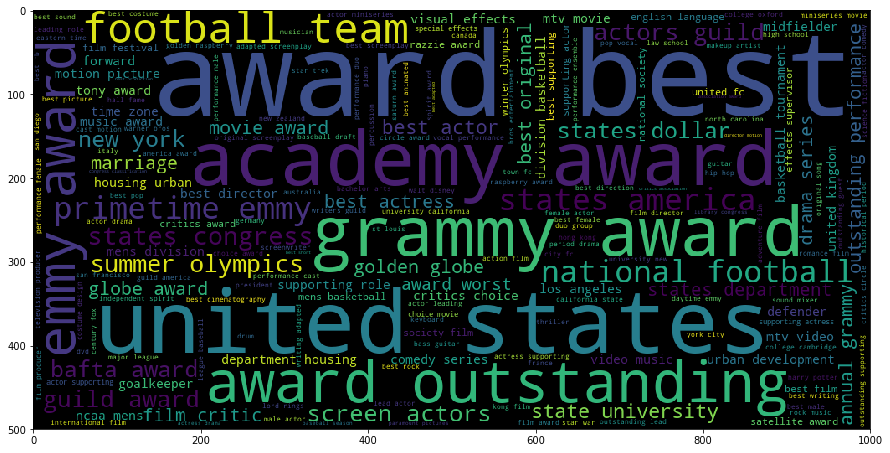

In [8]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

### Most popular relations

In [9]:
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(rel_text))

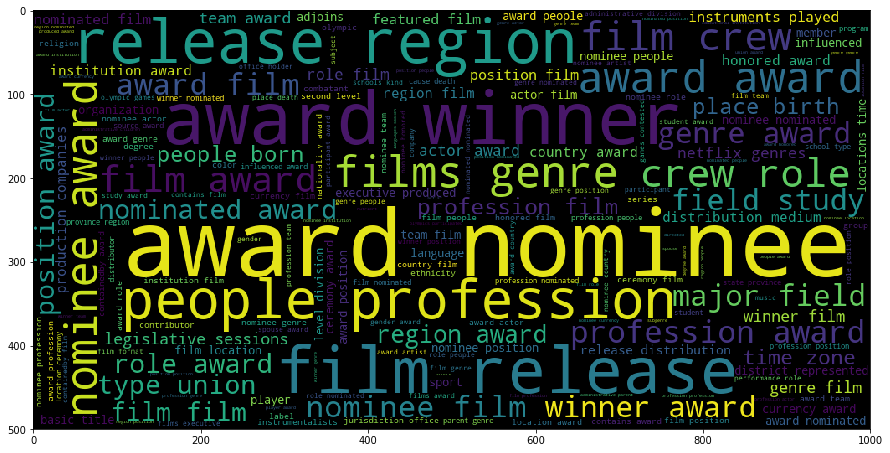

In [10]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

## Building the Knowledge graph

In [11]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from collections import Counter

## Loading the sample dataset with positive and negative samples

In [12]:
import pandas as pd
df1=pd.read_csv('subjects_total',names=['subjects'])
df2=pd.read_csv('relations_total',names=['relations'])
df3=pd.read_csv('objects_total',names=['objects'])
df4=pd.read_csv('labels',names=['labels'])
result=pd.concat([df1,df2,df3,df4],axis=1)

In [13]:
result.head(20)

,subjects,relations,objects,labels
0,Steven Moffat,containedby,Humboldt County,1.0
1,National Autonomous University of Mexico,ceremony,ADO Den Haag,1.0
2,Friday Night Lights,role,Prince Edward Island,1.0
3,Grammy Award for Best R&B Instrumental Perform...,award nominee,B.B. King,0.0
4,Blade II,film crew role,Art Director,0.0
5,Designer,children,Tactical shooter,1.0
6,Portsmouth F.C.,player,Ben Sahar,0.0
7,Richard Burton,award,Academy Award for Best Actor,0.0
8,K-19: The Widowmaker,gender,Apache Wars,1.0
9,Virginia,religion,Presbyterianism,0.0


### Filtering out positive triples

In [14]:
positive_ent = result.loc[result['labels']==0]

In [15]:
positive_ent.head(50)

,subjects,relations,objects,labels
3,Grammy Award for Best R&B Instrumental Perform...,award nominee,B.B. King,0.0
4,Blade II,film crew role,Art Director,0.0
6,Portsmouth F.C.,player,Ben Sahar,0.0
7,Richard Burton,award,Academy Award for Best Actor,0.0
9,Virginia,religion,Presbyterianism,0.0
10,Jackass 3D,person,Spike Jonze,0.0
11,Musician,people with this profession,Matt Stone,0.0
13,Mandolin,role,Mellotron,0.0
15,Razzie Award for Worst Picture,award nominee,Jerry Weintraub,0.0
17,Jay-Z,award,Grammy Award for Best Rap Album,0.0


### Filtering out negative samples

In [16]:
neg_ent = result.loc[result['labels']==1]

In [17]:
neg_ent.head(50)

,subjects,relations,objects,labels
0,Steven Moffat,containedby,Humboldt County,1.0
1,National Autonomous University of Mexico,ceremony,ADO Den Haag,1.0
2,Friday Night Lights,role,Prince Edward Island,1.0
5,Designer,children,Tactical shooter,1.0
8,K-19: The Widowmaker,gender,Apache Wars,1.0
12,ECW on TNN,institution,Living in the Material World: George Harrison,1.0
14,Movie theater,institution,Turn-based tactics,1.0
16,Butch Cassidy and the Sundance Kid,county,Hotel,1.0
18,Contiguous United States,film,Billy Crudup,1.0
19,Chelmsford,honored for,Shanghai Noon,1.0


### Creating the graph for a sample of the dataset

In [18]:
def add_nodes(G, df, col, type_name):
    """Add entities to G from the 'col' column of the 'df' DataFrame. The new nodes are annotated with 'type_name' label."""
    nodes = list(df[~df[col].isnull()][col].unique())
    G.add_nodes_from([(n,dict(type=type_name)) for n in nodes])
    print("Nodes (%s,%s) were added" % (col, type_name))
    
def add_links(G, df, col1, col2, type_name):
    """Add links to G from the 'df' DataFrame. The new edges are annotated with 'type_name' label."""
    df_tmp = df[(~df[col1].isnull()) & (~df[col2].isnull())]
    links = list(zip(df_tmp[col1],df_tmp[col2]))
    G.add_edges_from([(src, trg, dict(type=type_name)) for src, trg in links])
    print("Edges (%s->%s,%s) were added" % (col1, col2, type_name))

In [19]:
import networkx as nx
G = nx.DiGraph()

In [20]:
add_nodes(G, positive_ent[:1000], "subjects", "sub")

Nodes (subjects,sub) were added


In [21]:
add_nodes(G, positive_ent[:1000], "objects", "obj")

Nodes (objects,obj) were added


In [22]:
add_links(G, positive_ent[:1000],"subjects","objects",'rel')

Edges (subjects->objects,rel) were added


## Graph properties

In [23]:
print("No: of nodes: %d No: of edges: %d" % (G.number_of_nodes(),G.number_of_edges()))

No: of nodes: 1597 No: of edges: 999


In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
g = G

In [25]:
pos=nx.fruchterman_reingold_layout(G)   

In [26]:
labels=[]
for key in pos.items():
    labels.append(key)

In [27]:
Xn=[]
Yn=[]
for key,values in pos.items():
    Xn.append(pos[key][0])
    Yn.append(pos[key][1])

In [28]:
trace_nodes=dict(type='scatter',
                 x=Xn, 
                 y=Yn,
                 mode='markers',
                 marker=dict(size=5, color='rgb(0,240,0)'),
                 text=labels,
                 hoverinfo='text')

In [29]:
Xe=[]
Ye=[]
for e in G.edges():
    Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
    Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

In [30]:
trace_edges=dict(type='scatter',
                 mode='lines',
                 x=Xe,
                 y=Ye,
                 line=dict(width=1, color='rgb(25,25,25)'),
                 hoverinfo='none' 
                )

In [31]:
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=dict(title= 'Knowledge Graph',  
            font= dict(family='Balto'),
            width=1000,
            height=1000,
            autosize=False,
            showlegend=False,
            xaxis=axis,
            yaxis=axis,
            margin=dict(
            l=40,
            r=40,
            b=85,
            t=100,
            pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#efecea', #set background color            
    )


fig = dict(data=[trace_edges, trace_nodes], layout=layout)

In [32]:
import plotly 
plotly.tools.set_credentials_file(username='aswathn1', api_key='jKdGsQfPdVGU6A8Mmlru')
import plotly.plotly as py
py.iplot(fig)

### Number of strongly connected components 

In [33]:
nx.number_strongly_connected_components(G)

1596

### Entities sorted by degree centrality

In [34]:
sorted(nx.degree_centrality(G), key=lambda x: x[1], reverse=True)

['Czech Language',
 'Czech Republic',
 'Ryanair',
 'My Big Fat Greek Wedding',
 'Hyde Park on Hudson',
 'My Left Foot',
 'Synecdoche, New York',
 'Xylophone',
 'Pyotr Ilyich Tchaikovsky',
 'Tyrannosaur',
 'Lyricist',
 'Mystery',
 'Ryan Murphy',
 'Ry Cooder',
 'Ryan Gosling',
 'My Name Is Khan',
 'Synthesizer',
 'Cyndi Lauper',
 'Sylvia Plath',
 'Typhoid fever',
 'Sydney',
 'Kyrgyzstan',
 'Executive Producer',
 'Axl Rose',
 'Switzerland',
 'Twentieth Century Fox Film Corp',
 'Swarthmore College',
 'Owen Wilson',
 'Gwyneth Paltrow',
 'Twister',
 'Sweden',
 'Swoosie Kurtz',
 'Ovarian cancer',
 'Aviation',
 'Avant-garde music',
 'Eva Longoria',
 'Musician',
 'Russia',
 'Superman Returns',
 'Susannah York',
 'Judd Apatow',
 'Super 35',
 'Kurt Cobain',
 'Yukon',
 'Author',
 'Julie Bowen',
 "Queen's University",
 'Hugo Award for Best Short Story',
 'Julia Roberts',
 'Summit',
 'Sunday Bloody Sunday',
 'Quills',
 'Suspense',
 'Lucille Ball',
 'Judo',
 'Punjabis',
 'Wuthering Heights',
 'Auburn

### Entities sorted by in-degree 

From the below output we can see that the entity United States of America, has the highest number of links pointing to it from other entities.

In [35]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)

[('United States of America', 22),
 ('United States Dollar', 14),
 ('Midfielder', 7),
 ('United States Department of Housing and Urban Development', 7),
 ('English Language', 7),
 ('United Kingdom', 6),
 ('Male', 6),
 ('Marriage', 5),
 ('Actor', 5),
 ('Defender', 5),
 ('Sound Mixer', 4),
 ('Forward', 4),
 ('Netherlands', 4),
 ('Female', 4),
 ('Writer', 3),
 ('Comedy', 3),
 ('Canada', 3),
 ('Universal Studios', 3),
 ('Bachelor of Arts', 3),
 ('Germany', 3),
 ('Goalkeeper', 3),
 ('Eastern Time Zone', 3),
 ('Art Director', 3),
 ('Argentina', 3),
 ('DVD', 3),
 ('France', 3),
 ('Action Film', 3),
 ('Hungary', 3),
 ('Academy Award for Best Cinematography', 2),
 ('History', 2),
 ('Comedian', 2),
 ('Academy Award for Best Actress in a Supporting Role', 2),
 ('Author', 2),
 ('Academy Award for Best Director', 2),
 ('Hampton', 2),
 ('Japan', 2),
 ('California', 2),
 ('Visual Effects Supervisor', 2),
 ('Razzie Award for Worst Prequel, Remake, Rip-off or Sequel', 2),
 ('London', 2),
 ('Russian Lan

### Entities sorted by out-degree 

From the below output we can see that the entity marriage, has the highest number of links pointing to other entities.

In [36]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)

[('Marriage', 10),
 ('Actor', 8),
 ('Bachelor of Arts', 4),
 ('Film Producer', 4),
 ('Forward', 4),
 ('Sound Mixer', 3),
 ('Xylophone', 3),
 ('Visual Effects Supervisor', 3),
 ('Musician', 2),
 ('Jonathan Winters', 2),
 ('Academy Award for Best Cinematography', 2),
 ('Sex and the City', 2),
 ('Piano', 2),
 ('Edwin B. Willis', 2),
 ('Henry Gibson', 2),
 ('Filmmaking', 2),
 ('Special Effects Supervisor', 2),
 ('Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series', 2),
 ('Michigan State University', 2),
 ('Academy Award for Best Actor in a Supporting Role', 2),
 ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series',
  2),
 ('Bruce Greenwood', 2),
 ('Thriller', 2),
 ('Insidious', 2),
 ('Philip Seymour Hoffman', 2),
 ('X-Men Origins: Wolverine', 2),
 ('P.S. I Love You', 2),
 ('Bread', 2),
 ('Eddie Murphy', 2),
 ('The Hobbit: An Unexpected Journey', 2),
 ('Canada', 2),
 ('Film director', 2),
 ('Arizona State University', 2),
 ('Lead guit

### Finding cycles

In [37]:
nx.find_cycle(G)

[('Vassar College', 'Vassar College')]

### Inference

From the above analysis and visualization of the knowledge graph, we evaluate the important graph theory properties of the knowledge graph on a sample of the entire graph. We can see that the graph is highly disconnected because of the presence of a wide variety of entities which are not all related to each other. This indicates that the knowledge graph covers a wide domain of concepts.